# Data Loading

In [271]:
import pandas as pd
#import janitor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
import statsmodels.api as sm

%matplotlib inline

In [272]:
wd = 'C:/Users/vinde/OneDrive/Dokumenter/DTU/02450/Projects/Project_2/wine_kaggle/'

In [273]:
# -*- coding: utf-8 -*-
#df_red=pd.read_csv(wd + 'winequality-red.csv', sep = ';')
df_white=pd.read_csv(wd + 'winequality-white.csv', sep = ';')

#df_red.columns = df_red.columns.str.replace(' ', '_')
df_white.columns = df_white.columns.str.replace(' ', '_')

df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [274]:

#print('red shape is', df_red.shape)
print('white shape is', df_white.shape)

white shape is (4898, 12)


Categorical features

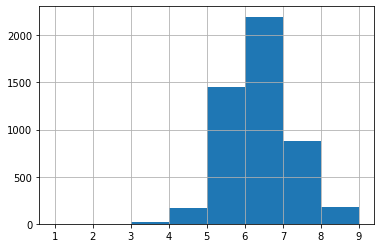

In [275]:
df_white.quality.hist(bins = range(1, 10, 1))

In [276]:
#sum_red = df_red
#summary_red = {}
#for columns in sum_red.columns:
#    summary_red.update({columns : pd.Series([df_red[columns].count() - len(df_red.index), df_red[columns].mean(), df_red[columns].median(),
#    df_red[columns].std(), df_red[columns].min(), df_red[columns].max(), df_red[columns].mode()])})
#summary_red = pd.DataFrame(summary_red)
#print(summary_red)

In [277]:
sum_white = df_white
summary_white = {}
for columns in sum_white.columns:
    summary_white.update({columns : pd.Series([df_white[columns].count() - len(df_white.index), df_white[columns].mean(), df_white[columns].median(),
    df_white[columns].std(), df_white[columns].min(), df_white[columns].max(), df_white[columns].mode()])})
summary_white = pd.DataFrame(summary_white)
print(summary_white)


             fixed_acidity          volatile_acidity              citric_acid  \
0                        0                         0                        0   
1                  6.85479                  0.278241                 0.334192   
2                      6.8                      0.26                     0.32   
3                 0.843868                  0.100795                  0.12102   
4                      3.8                      0.08                        0   
5                     14.2                       1.1                     1.66   
6  0    6.8
dtype: float64  0    0.28
dtype: float64  0    0.3
dtype: float64   

            residual_sugar                  chlorides  \
0                        0                          0   
1                  6.39141                  0.0457724   
2                      5.2                      0.043   
3                  5.07206                   0.021848   
4                      0.6                      0.009   
5        

In [278]:
#boxplot_red = df_red.boxplot(return_type='axes')

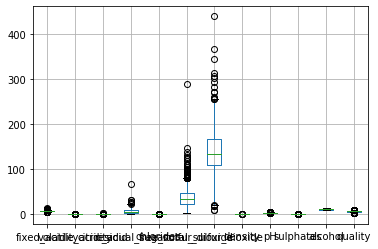

In [279]:
boxplot_white = df_white.boxplot(return_type='axes')

In [280]:
standardized_df_white = df_white
for column in standardized_df_white.iloc[: , :11]:
    m = standardized_df_white[column].mean()
    stdev = standardized_df_white[column].std()
    standardized_df_white[column] = (standardized_df_white[column]-m)/stdev

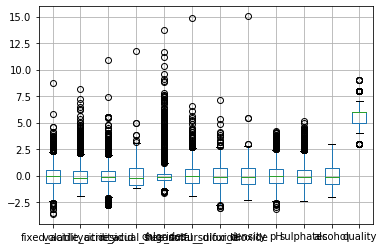

In [281]:
boxplot_stadardized_white = standardized_df_white.boxplot(return_type='axes')

### data analysis + cleaning

In [282]:
#look for NaN
#print('''red table
#''', df_red.isna().sum())
print('''white table

''' , df_white.isna().sum())

white table

 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [283]:
a = standardized_df_white.cov()
print(a)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.022697     0.289181   
volatile_acidity          -0.022697          1.000000    -0.149472   
citric_acid                0.289181         -0.149472     1.000000   
residual_sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free_sulfur_dioxide       -0.049396         -0.097012     0.094077   
total_sulfur_dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.100664         -0.172454    -0.008156   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [284]:
def create_hist(dataframe, column):
        attribute = dataframe[column]
        m = attribute.mean()
        stdev = attribute.std()
        attribute = (attribute-m)/stdev
        attribute.hist(bins = 100)
        plt.title('Hist ' + column)
        plt.xlabel('Sandardized (-mean/std)')
        plt.ylabel('Frequency')
        #plt.savefig(column + '-hist.png')
        test = stats.shapiro(attribute)
        print(test)
        sm.qqplot(attribute, line ='45') 

(0.9765701293945312, 1.1623575585974979e-27)


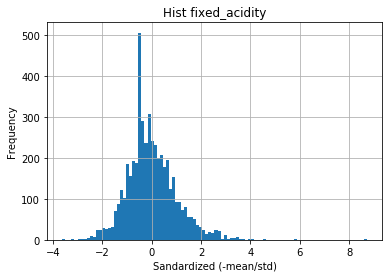

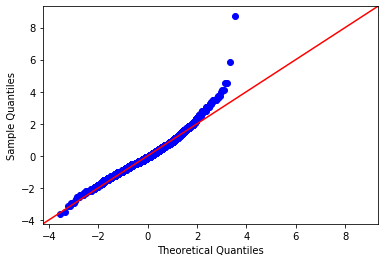

In [285]:
create_hist(df_white, 'fixed_acidity')


(0.9045487642288208, 0.0)


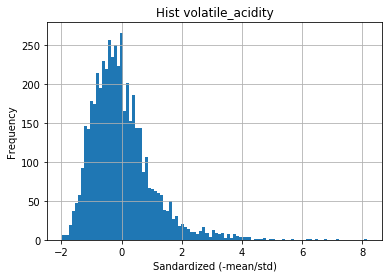

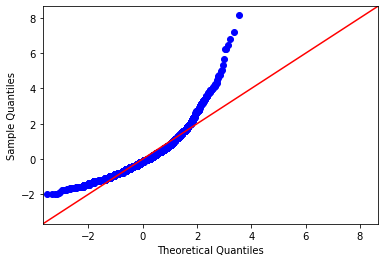

In [286]:
create_hist(df_white, 'volatile_acidity')
# log transform?

(0.922236442565918, 9.80908925027372e-45)


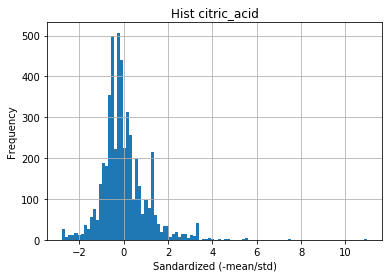

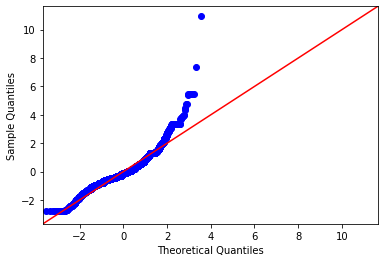

In [287]:
create_hist(df_white, 'citric_acid')


(0.8845707178115845, 0.0)


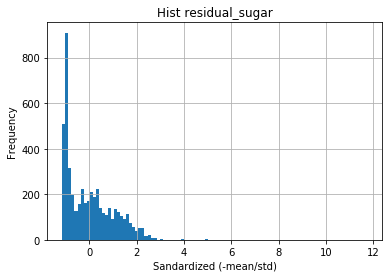

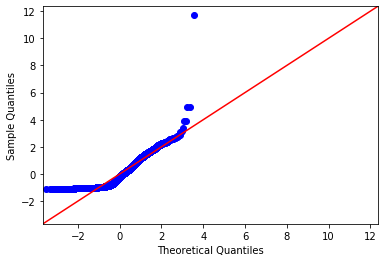

In [288]:
create_hist(df_white, 'residual_sugar')
# log transform??

(0.590808093547821, 0.0)


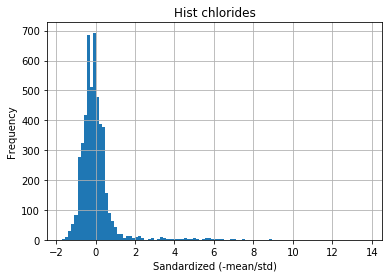

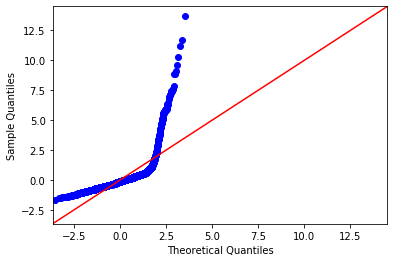

In [289]:
create_hist(df_white, 'chlorides')
# log transform??

(0.942069411277771, 3.858489334503027e-40)


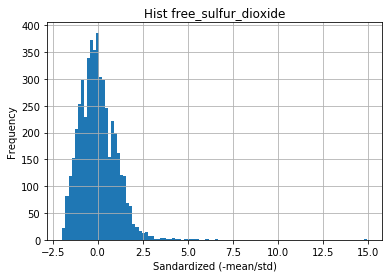

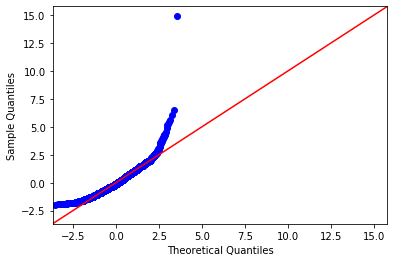

In [290]:
create_hist(df_white, 'free_sulfur_dioxide')


(0.9890146255493164, 4.383397569992536e-19)


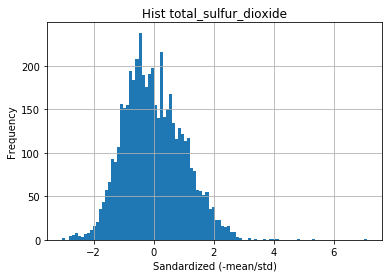

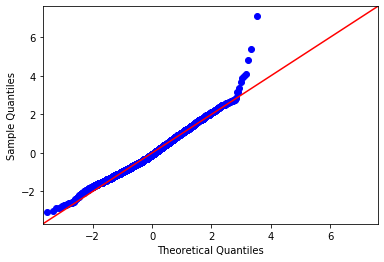

In [291]:
create_hist(df_white, 'total_sulfur_dioxide')


(0.9548017978668213, 1.7769160468508003e-36)


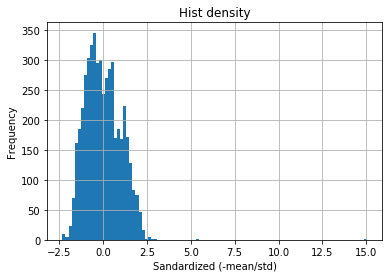

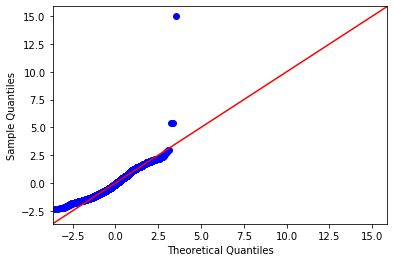

In [292]:
create_hist(df_white, 'density')


(0.9880951642990112, 6.4882050382962e-20)


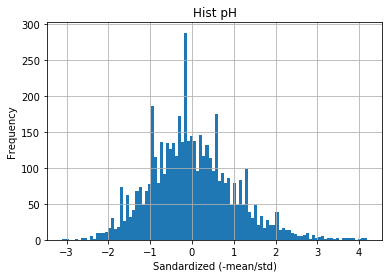

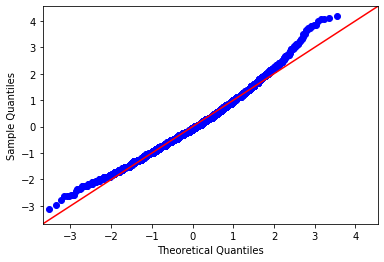

In [293]:
create_hist(df_white, 'pH')


(0.9516071677207947, 1.8191847240455923e-37)


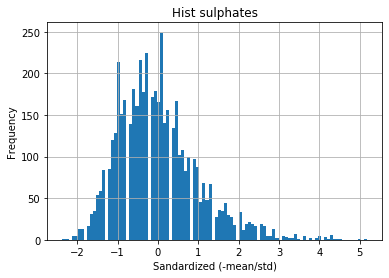

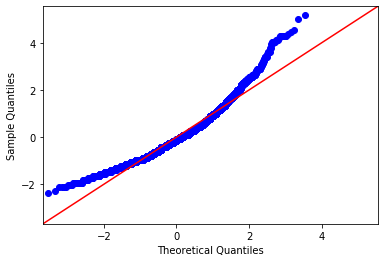

In [294]:
create_hist(df_white, 'sulphates')


(0.9552956223487854, 2.5561438190754244e-36)


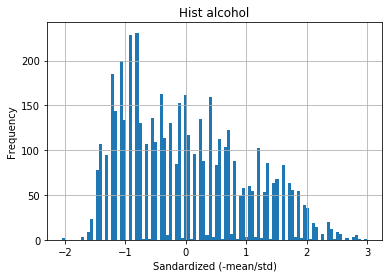

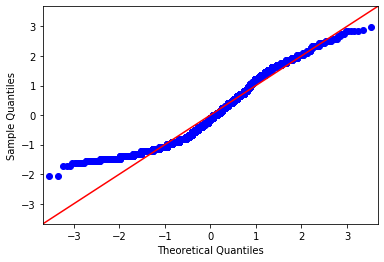

In [295]:
create_hist(df_white, 'alcohol')


(0.8890223503112793, 0.0)


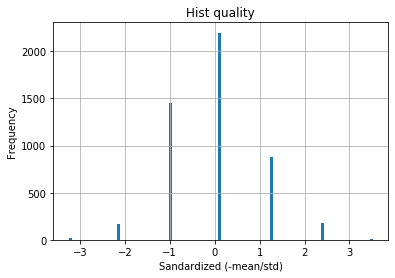

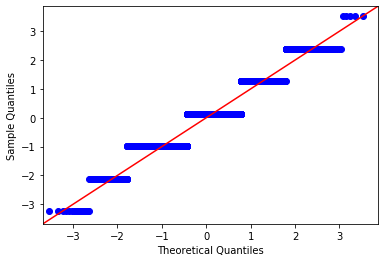

In [296]:
create_hist(df_white, 'quality')

# PCA

In [297]:
df_white_pca = standardized_df_white
df_white_pca

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,6
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,6
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,6
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,6
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,6
5,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,6
6,-0.775936,0.414297,-1.439364,0.119988,-0.035351,-0.312109,-0.055547,0.291759,-0.054746,-0.173903,-0.742932,6
7,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,6
8,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,6
9,1.475600,-0.577820,0.791676,-0.964385,-0.081122,-0.429707,-0.220261,-0.076023,0.210154,-0.349149,0.394706,6


In [298]:
#Useful for later classification
mappings={}
from sklearn.preprocessing import LabelEncoder

categorical=['quality']

def cat_to_int(df, cats, mappings):
    for i in cats:
        le = LabelEncoder()
        df[i+'_int']=le.fit_transform(df[i])+1
        le.fit(df[i])
        mappings[i] = dict(zip(le.classes_, le.transform(le.classes_)+1))
        df.drop(columns=[i],inplace=True)

    return df , mappings

In [299]:
df_white_pca

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,6
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,6
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,6
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,6
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,6
5,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,6
6,-0.775936,0.414297,-1.439364,0.119988,-0.035351,-0.312109,-0.055547,0.291759,-0.054746,-0.173903,-0.742932,6
7,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,6
8,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,6
9,1.475600,-0.577820,0.791676,-0.964385,-0.081122,-0.429707,-0.220261,-0.076023,0.210154,-0.349149,0.394706,6


In [300]:
mappings_pca={}

df_white_pca, mappings_pca = cat_to_int(df_white_pca, ['quality'], mappings_pca)


In [301]:
df_white_pca_1 = df_white_pca[df_white_pca['quality_int'] == 1]
df_white_pca_2 = df_white_pca[df_white_pca['quality_int'] == 2]
df_white_pca_3 = df_white_pca[df_white_pca['quality_int'] == 3]
df_white_pca_4 = df_white_pca[df_white_pca['quality_int'] == 4]
df_white_pca_5 = df_white_pca[df_white_pca['quality_int'] == 5]
df_white_pca_6 = df_white_pca[df_white_pca['quality_int'] == 6]
df_white_pca_7 = df_white_pca[df_white_pca['quality_int'] == 7]
df_white_pca_8 = df_white_pca[df_white_pca['quality_int'] == 8]
df_white_pca_9 = df_white_pca[df_white_pca['quality_int'] == 9]
df_white_pca_10 = df_white_pca[df_white_pca['quality_int'] == 10]

In [302]:
from scipy.linalg import svd

attributeNames=list(df_white_pca.columns)

y=df_white_pca['quality_int']


N=len(df_white_pca)
X=df_white_pca.drop(columns='quality_int').values
#Y = X - np.ones((N,1))*X.mean(axis=0)

from sklearn import preprocessing

x = X #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_white_pca = pd.DataFrame(x_scaled, columns = df_white_pca.drop(columns='quality_int').columns)

#%%
# PCA by computing SVD of Y
U,S,V = svd(x_scaled,full_matrices=False)
Z = x_scaled @ V


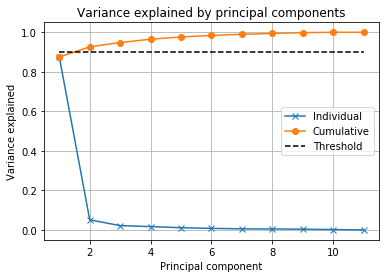

In [303]:
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

In [304]:
mappings_pca

{'quality': {3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}}

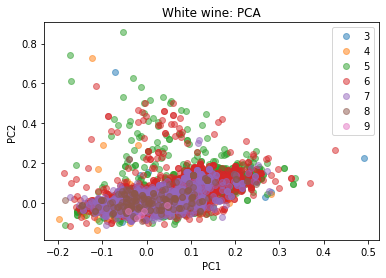

In [305]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend


i = 0
j = 1
classNames=[i for i in mappings_pca['quality']]
C = len(classNames)

# Plot PCA of the data
f = figure()
title('White wine: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

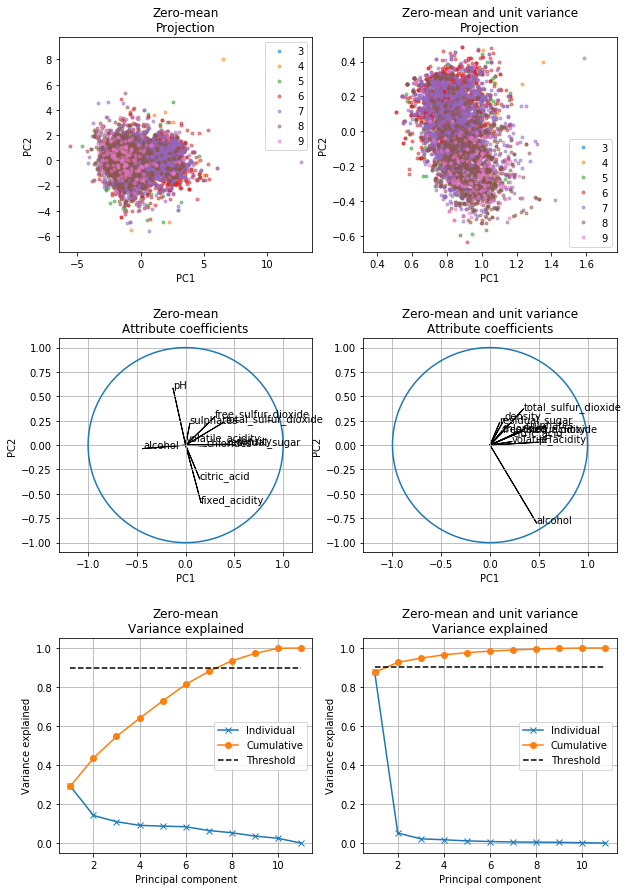

In [306]:

Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
#Y2 = Y2*(1/np.std(Y2,0))
Y2=x_scaled

Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2


for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()

In [307]:
rho


array([8.74876832e-01, 5.12162189e-02, 2.17702017e-02, 1.69540308e-02,
       1.11080618e-02, 7.99375316e-03, 5.59325392e-03, 4.72311240e-03,
       3.76174228e-03, 1.87394863e-03, 1.28844366e-04])

Detecting outliers - Mahalanobis

In [308]:
import scipy as sp
df_white_pca

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
5,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
6,0.230769,0.235294,0.096386,0.098160,0.106825,0.097561,0.294664,0.150183,0.418182,0.290698,0.258065
7,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
8,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
9,0.413462,0.137255,0.259036,0.013804,0.103858,0.090592,0.278422,0.128976,0.454545,0.267442,0.483871


In [309]:

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.pinv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df_white_pca
df_x['mahala'] = mahalanobis(x=df_x, data=df_white_pca)
df_x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,mahala
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,9.263907
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6.682467
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,8.293968
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,3.223621
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,3.223621


In [ ]:
from scipy.stats import norm
a = df_x['mahala']
a.hist(bins = 100)
a = np.log10(a)
print(a.head(20))

stdev = a.std()
print('stdev', stdev)
mean = a.mean()
print('mean', mean)
a = (a-mean)/stdev
a.hist(bins = 100)
plt.xlim(0, 100)
plt.title('Mahalanobis')
plt.xlabel('Mahala distance')
#kolmogorov normality test
test = stats.shapiro(a)
print(test)

sm.qqplot(a, line ='45') 
plt.title('Mahalanobis')
plt.show() 


In [478]:
from scipy.stats import norm
norm.ppf((1-0.05), df=417)

TypeError: _parse_args() got an unexpected keyword argument 'df'

In [476]:
from scipy.stats import mannwhitneyu
mannwhitneyu((1-0.05), df=417)

TypeError: mannwhitneyu() got an unexpected keyword argument 'df'

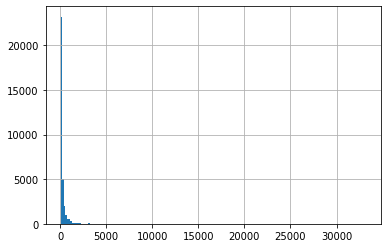

In [464]:
from scipy.stats import chisquare
a = df_x['mahala']
a.hist(bins = 200)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)

model.fit(x_scaled, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
'''from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from skprog.wrappers import TreesProgressor

y=df_pca.state_int
X=df_pca.drop(columns=['state_int','pledged', 'backers', 'usd_pledged_real',])
forest = TreesProgressor(ExtraTreesClassifier(n_estimators=250,
                              random_state=0))


forest.fit(X, y)

importances = forest.clf.feature_importances_
std = np.std([importances for tree in forest.clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),(X.columns.tolist())[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()'''